Simplest decision tree with iris dataset

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# create classifier
clf = DecisionTreeClassifier(max_depth=3, random_state=42) # 5, 10, 20

In [ ]:
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

calculate the evaluation metrics : accuracy, confusion matrix, classification_report



In [ ]:
print ("training accuracy:", clf.score(X_train, y_train))
print ("testing accuracy:", clf.score(X_test, y_test))

training accuracy: 0.9583333333333334
testing accuracy: 1.0


Regression Tree

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [ ]:
housing = fetch_california_housing()
X = housing.data
y = housing.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
dt_reg= DecisionTreeRegressor (max_depth =3, random_state=42)
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(max_depth=3, random_state=42)

In [ ]:
y_pred = dt_reg.predict(x_test)

In [ ]:
#evaluation metrics

mse= mean_squared_error(y_test, y_pred)
print ("MSE:", mse)
print ("RMSE:", np.sqrt(mse))

#print R square value

MSE: 0.6424109810265641
RMSE: 0.8015054466605727


### **change the max _depth values to  5, 10, 20 see how it is impacting the results**

In [ ]:
from sklearn.datasets import load_wine
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
wine = load_wine()
X, y = wine.data, wine.target

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Model 1: CART model (gini impurity)**

In [ ]:

cart_dt = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='gini')
cart_dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
cart_dt_pred = cart_dt.predict(X_test)

In [ ]:
print ("training accuracy:", cart_dt.score(X_train, y_train))
print ("testing accuracy:", cart_dt.score(X_test, y_test))

training accuracy: 1.0
testing accuracy: 0.9444444444444444


**Model 2: ID3 model (Entropy)**

In [ ]:

id3_dt = DecisionTreeClassifier(max_depth=5, random_state=42, criterion='entropy')
id3_dt.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=42)

In [ ]:
id3_dt_pred = id3_dt.predict(X_test)

In [ ]:
#Evaluation and comparison

In [ ]:
print ("CART confusion matrix:\n", confusion_matrix(y_test, cart_dt_pred))
print ("ID3 confusion matrix:\n", confusion_matrix(y_test, id3_dt_pred))
print ("classification report:", classification_report(y_test, cart_dt_pred))
print ("classification report:", classification_report(y_test, id3_dt_pred))

CART confusion matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
ID3 confusion matrix:
 [[14  0  0]
 [ 0 14  0]
 [ 1  2  5]]
classification report:               precision    recall  f1-score   support

           0       0.93      0.93      0.93        14
           1       0.93      1.00      0.97        14
           2       1.00      0.88      0.93         8

    accuracy                           0.94        36
   macro avg       0.95      0.93      0.94        36
weighted avg       0.95      0.94      0.94        36

classification report:               precision    recall  f1-score   support

           0       0.93      1.00      0.97        14
           1       0.88      1.00      0.93        14
           2       1.00      0.62      0.77         8

    accuracy                           0.92        36
   macro avg       0.94      0.88      0.89        36
weighted avg       0.93      0.92      0.91        36



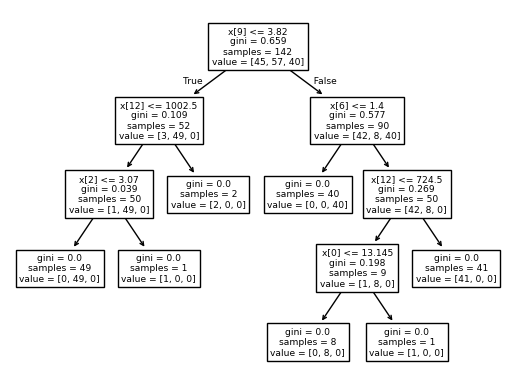

In [ ]:
from sklearn.tree import plot_tree
plot_tree(cart_dt)
plt.show()

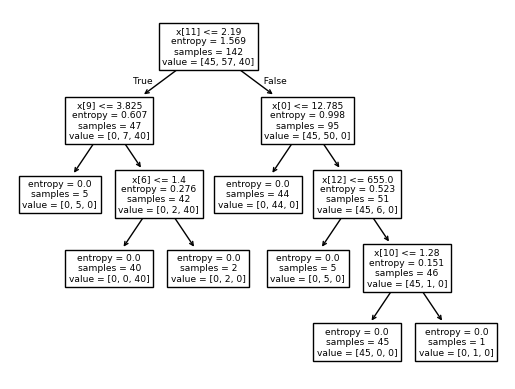

In [ ]:
plot_tree(id3_dt)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
print ("LR confusion matrix:\n", confusion_matrix(y_test, y_pred_lr))
print ("classification report:", classification_report(y_test, y_pred_lr))

LR confusion matrix:
 [[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]
classification report:               precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.93      1.00      0.97        14
           2       1.00      1.00      1.00         8

    accuracy                           0.97        36
   macro avg       0.98      0.98      0.98        36
weighted avg       0.97      0.97      0.97        36

